Census population in Kenya is ongoing.
We would like to look at how the population numbers looked like during the 2009 census.
The data used here is from open data

In [39]:
# import modules
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
pop_data = pd.read_csv("Data/Summary_Population_Distribution_By_District.csv")

In [75]:
# overview
pop_data.head()

,District,rural/urban,Male,Female,Total,Households,Area_in_Sq_Km,_Household_Density_,Population_Density,Gender_Index,County,Location,Location_1,Province,OBJECTID
0,NAIROBI WEST,Rural,0,0,0,0,0.00,NaN,NaN,NaN,NAIROBI,"NAIROBI WEST, NAIROBI Kenya\n",NaN,36.799202,0
1,NAIROBI EAST,Rural,0,0,0,0,0.00,NaN,NaN,NaN,NAIROBI,"NAIROBI EAST, NAIROBI Kenya\n",NaN,36.967484,1
2,NAIROBI NORTH,Rural,0,0,0,0,0.00,NaN,NaN,NaN,NAIROBI,"NAIROBI NORTH, NAIROBI Kenya\n",NaN,36.891126,2
3,WESTLANDS,Rural,0,0,0,0,0.00,NaN,NaN,NaN,NAIROBI,"WESTLANDS, NAIROBI Kenya\n",NaN,36.788256,3
4,NYANDARUA NORTH,Rural,106111,109785,215896,52503,1394.69,37.64,109861.0821,1.034624,CENTRAL,"NYANDARUA NORTH, CENTRAL Kenya\n",NaN,36.423431,4


In [74]:
pop_data.fillna(value=0)
#quick summary
pop_data.describe()

,Male,Female,Total,Households,Area_in_Sq_Km,_Household_Density_,Population_Density,Gender_Index,Location_1,Province,OBJECTID
count,316.000000,316.000000,3.160000e+02,316.000000,316.000000,290.000000,290.000000,290.000000,0.0,316.000000,316.000000
mean,60735.626582,61448.224684,1.221839e+05,27746.689873,1839.598608,601.943552,67302.792308,1.014161,NaN,36.583759,157.500000
std,67904.042331,67267.211785,1.350177e+05,37068.244631,4620.038177,995.453048,67673.386334,0.079238,NaN,1.827359,91.365566
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.400000,486.702929,0.770335,NaN,34.020468,0.000000
25%,12418.250000,12040.250000,2.439650e+04,6043.250000,32.182500,36.470000,21699.871322,0.980986,NaN,34.902118,78.750000
50%,45400.000000,46362.500000,9.150750e+04,19699.500000,218.730000,147.170000,54714.707670,1.023679,NaN,36.537310,157.500000
75%,88108.250000,90530.750000,1.788535e+05,36117.500000,1015.130000,920.395000,98362.057540,1.065183,NaN,37.625228,236.250000
max,582554.000000,561862.000000,1.144416e+06,369866.000000,39248.030000,9720.770000,564431.826600,1.428571,NaN,41.292948,315.000000


In [72]:
# quick summary by gender
male = sum(pop_data['Male'])
female = sum(pop_data['Female'])
# calculate ratios
percent_male = round((male/(male+female))*100,2)

print("Total Male Population was", "{:,}".format(male),"while total female population was","{:,}".format(female)+".",
      "Representing",percent_male,"to",100-percent_male,"percentage distribution respectively")

Total Male Population was 19,192,458 while total female population was 19,417,639. Representing 49.71 to 50.29 percentage distribution respectively


In [42]:
# Distribution by Province
provinceSummary = pop_data.groupby('County')['Total'].sum().reset_index()
provinceSummary = provinceSummary.sort_values(by='Total',ascending=False)
provinceSummary

,County,Total
6,RIFT VALLEY,10006805
2,EASTERN,5668123
5,NYANZA,5442711
0,CENTRAL,4383743
7,WESTERN,4334282
1,COAST,3325307
3,NAIROBI,3138369
4,NORTH EASTERN,2310757


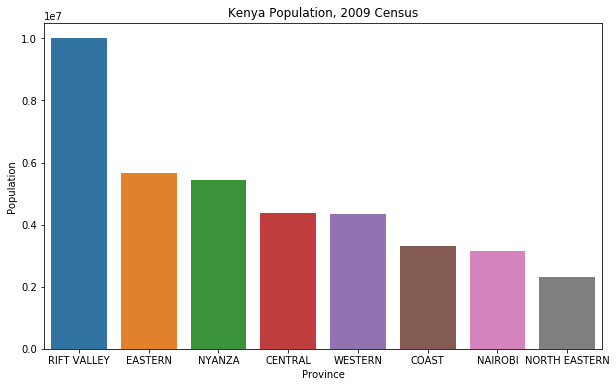

In [61]:
# Plot the distribution
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(provinceSummary['County'],provinceSummary['Total'])
plt.title("Kenya Population, 2009 Census")
plt.xlabel("Province")
plt.ylabel("Population")
plt.show()

In [62]:
# Interesting Rift Valley had the highest population
# Is this data accurate?

#### Gender Distribution

In [81]:
genderDistribution = pd.pivot_table(pop_data,values=['Male','Female'],index='County',aggfunc=sum,fill_value=0,dropna=True)
genderDistribution.reset_index()

,County,Female,Male
0,CENTRAL,2230760,2152983
1,COAST,1668628,1656679
2,EASTERN,2884776,2783347
3,NAIROBI,1533139,1605230
4,NORTH EASTERN,1052109,1258648
5,NYANZA,2824977,2617734
6,RIFT VALLEY,4980343,5026462
7,WESTERN,2242907,2091375


In [76]:
pd.pivot_table?